In [1]:
import pandas as pd 
import numpy as np
import os


In [2]:
to_file = r'D:\6654305\Du_An_Quan_Trading\Booting\features'
files = [f for f in os.listdir(to_file) if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join(to_file, file)) for file in files]
df= pd.concat(dfs, ignore_index=True)

In [3]:
df['TradingDate'] = pd.to_datetime(df['TradingDate'], format='%d/%m/%Y', errors='coerce')
df = df.drop(columns="Time")
df= df.dropna()
df.isnull().sum()

Symbol         0
Market         0
TradingDate    0
Open           0
High           0
Low            0
Close          0
Volume         0
Value          0
SMA_20         0
EMA_20         0
RSI            0
MACD           0
Signal_Line    0
Middle_Band    0
Upper_Band     0
Lower_Band     0
TR             0
ATR            0
OBV            0
VMA_20         0
%K             0
%D             0
ROC            0
MFI            0
Williams_%R    0
dtype: int64

In [4]:
df.columns

Index(['Symbol', 'Market', 'TradingDate', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Value', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Signal_Line',
       'Middle_Band', 'Upper_Band', 'Lower_Band', 'TR', 'ATR', 'OBV', 'VMA_20',
       '%K', '%D', 'ROC', 'MFI', 'Williams_%R'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395697 entries, 19 to 401247
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Symbol       395697 non-null  object        
 1   Market       395697 non-null  object        
 2   TradingDate  395697 non-null  datetime64[ns]
 3   Open         395697 non-null  int64         
 4   High         395697 non-null  int64         
 5   Low          395697 non-null  int64         
 6   Close        395697 non-null  int64         
 7   Volume       395697 non-null  int64         
 8   Value        395697 non-null  float64       
 9   SMA_20       395697 non-null  float64       
 10  EMA_20       395697 non-null  float64       
 11  RSI          395697 non-null  float64       
 12  MACD         395697 non-null  float64       
 13  Signal_Line  395697 non-null  float64       
 14  Middle_Band  395697 non-null  float64       
 15  Upper_Band   395697 non-null  float64 

In [6]:
cols = df[['SMA_20', 'EMA_20', 'RSI', 'MACD', 'Signal_Line',
       'Middle_Band', 'Upper_Band', 'Lower_Band', 'ATR', 'OBV', 'VMA_20',
       '%K', '%D', 'ROC', 'MFI', 'Williams_%R']]

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LB = LabelEncoder()
df["Market"] = LB.fit_transform(df["Market"])
df["Symbol"]= LB.fit_transform(df["Symbol"])



In [8]:
df

,Symbol,Market,TradingDate,Open,High,Low,Close,Volume,Value,SMA_20,...,Lower_Band,TR,ATR,OBV,VMA_20,%K,%D,ROC,MFI,Williams_%R
19,0,1,2018-01-29,18135,18619,18135,18135,3326740,1.005466e+11,19523.75,...,18518.734813,1149,1954.500000,-2051340,1490614.0,88.235294,92.549344,-8.805190,43.210657,-11.764706
20,0,1,2018-01-30,17833,18135,17289,17349,1645900,4.780900e+10,19441.70,...,18056.988881,846,1988.071429,-3697240,1494714.0,84.411035,88.824016,-13.011432,36.822450,-15.588965
21,0,1,2018-01-31,17833,18317,17833,18075,1366360,4.097755e+10,19393.05,...,17887.040917,968,1999.428571,-2330880,1490866.5,87.943366,86.863232,-10.537517,35.492251,-12.056634
22,0,1,2018-02-01,18135,18135,17410,17440,636390,1.857500e+10,19317.00,...,17582.801201,725,2005.785714,-2967270,1446024.5,84.853793,85.736064,-12.172030,30.086111,-15.146207
23,0,1,2018-02-02,17531,17531,17410,17440,375140,1.083959e+10,19246.70,...,17327.938766,121,1993.785714,-3342410,1407674.0,84.853793,85.883650,-12.308930,25.132793,-15.146207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401243,99,1,2024-11-04,49300,50400,49200,49200,16700,8.268400e+08,50345.00,...,49549.023275,1200,985.714286,-66184,21565.0,5.263158,26.315789,-2.380952,37.708258,-94.736842
401244,99,1,2024-11-05,49150,49150,48000,49000,222300,1.079681e+10,50280.00,...,49281.896535,1200,928.571429,-288484,29090.0,20.833333,20.979532,-3.162055,19.479295,-79.166667
401245,99,1,2024-11-06,49500,49900,48600,49000,11500,5.619800e+08,50180.00,...,49089.177037,1300,978.571429,-299984,26570.0,20.833333,15.643275,-2.970297,20.259978,-79.166667
401246,99,1,2024-11-07,49550,50000,48500,49500,9200,4.546800e+08,50105.00,...,49045.754986,1500,1035.714286,-290784,25985.0,31.250000,24.305556,-1.394422,18.598583,-68.750000


In [9]:
df["Open_T+1"] = df["Open"].shift(-1)
df["Close_T+3"] = df["Close"].shift(-3)
df["Label"] = (df["Close_T+3"] > 1.02*df["Open_T+1"]).astype(float)
data= df.drop(columns=["Open_T+1","Close_T+3"])

(array([288949.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 106748.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

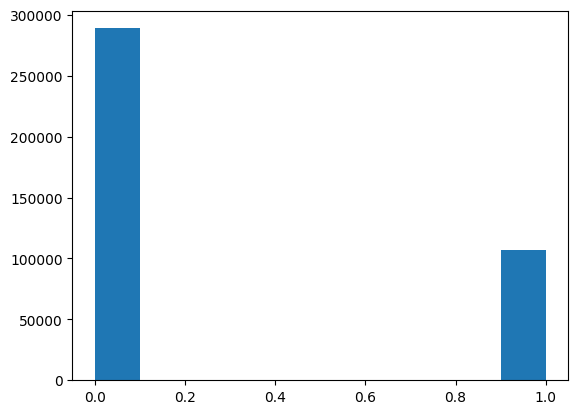

In [10]:
import matplotlib.pyplot as plt
plt.hist(data["Label"])

In [11]:
data = data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Value'])


In [12]:
X = data.drop(columns=["TradingDate","Label","Close"])
y= data["Label"]

In [30]:
df_train = data[data["TradingDate"] < '2024-01-01']
df_test = data[data["TradingDate"] >= '2024-01-01']


In [31]:
#Chia du lieu train  test 
X_train,y_train = df_train.drop(columns=["TradingDate","Label","Close"]),df_train["Label"]
X_test,y_test = df_test.drop(columns=["TradingDate","Label","Close"]),df_test["Label"]
SS = StandardScaler()

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344577 entries, 19 to 401034
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Symbol       344577 non-null  int32  
 1   Market       344577 non-null  int32  
 2   SMA_20       344577 non-null  float64
 3   EMA_20       344577 non-null  float64
 4   RSI          344577 non-null  float64
 5   MACD         344577 non-null  float64
 6   Signal_Line  344577 non-null  float64
 7   Middle_Band  344577 non-null  float64
 8   Upper_Band   344577 non-null  float64
 9   Lower_Band   344577 non-null  float64
 10  TR           344577 non-null  int64  
 11  ATR          344577 non-null  float64
 12  OBV          344577 non-null  int64  
 13  VMA_20       344577 non-null  float64
 14  %K           344577 non-null  float64
 15  %D           344577 non-null  float64
 16  ROC          344577 non-null  float64
 17  MFI          344577 non-null  float64
 18  Williams_%R  344577 non-null

In [33]:
X = np.nan_to_num(X, posinf=np.max(X[np.isfinite(X)]), neginf=np.min(X[np.isfinite(X)]))

X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())

X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.mean())

In [17]:
X_train.isnull().sum()
X_train = SS.fit_transform(X_train)
X_test = SS.fit_transform(X_test)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

In [39]:
model_tree = DecisionTreeClassifier(max_depth=40,max_features='sqrt',min_samples_leaf=1,min_samples_split=2)
model_tree.fit(X_train, y_train)
y_pred_DT_SK = model_tree.predict(X_test)
cr_DT = classification_report(y_pred_DT_SK,y_test)
print(cr_DT)


'''y_pred_test_tree = model_tree.predict_proba(X_test)[:,1]
#Tính AUC trên tập kiểm tra
auc_test_tree = roc_auc_score(y_test, y_pred_test_tree)
print("AUC test tree:", auc_test_tree)

y_pred_train_tree = model_tree.predict_proba(X_train)[:,1]
auc_train_tree = roc_auc_score(y_train,y_pred_train_tree)
print("AUC train tree: ",auc_train_tree)
scores = cross_val_score(model_tree, X, y, cv=5, scoring='roc_auc')
print("AUC Cross_validation: ", scores.mean())'''

              precision    recall  f1-score   support

         0.0       0.56      0.80      0.66     28203
         1.0       0.47      0.21      0.29     22917

    accuracy                           0.54     51120
   macro avg       0.51      0.51      0.47     51120
weighted avg       0.52      0.54      0.49     51120



'y_pred_test_tree = model_tree.predict_proba(X_test)[:,1]\n#Tính AUC trên tập kiểm tra\nauc_test_tree = roc_auc_score(y_test, y_pred_test_tree)\nprint("AUC test tree:", auc_test_tree)\n\ny_pred_train_tree = model_tree.predict_proba(X_train)[:,1]\nauc_train_tree = roc_auc_score(y_train,y_pred_train_tree)\nprint("AUC train tree: ",auc_train_tree)\nscores = cross_val_score(model_tree, X, y, cv=5, scoring=\'roc_auc\')\nprint("AUC Cross_validation: ", scores.mean())'

In [40]:
import lightgbm as lgb

model_GBM = lgb.LGBMClassifier(
    random_state=42,
    num_leaves=31,            
    max_depth=-2,             
    learning_rate=0.1,       
    n_estimators=200,    #Điều chỉnh số lượng cây 
    scale_pos_weight=10       
)

model_GBM.fit(X_train, y_train)

y_pred_test_GBM = model_GBM.predict(X_test)
cr_GBM = classification_report(y_test,y_pred_test_GBM)
print(cr_GBM)


[LightGBM] [Info] Number of positive: 248203, number of negative: 248203
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4438
[LightGBM] [Info] Number of data points in the train set: 496406, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

         0.0       0.82      0.08      0.15     40746
         1.0       0.21      0.93      0.34     10374

    accuracy                           0.25     51120
   macro avg       0.51      0.51      0.24     51120
weighted avg       0.70      0.25      0.19     51120



In [27]:
from sklearn.metrics import classification_report
y_pred_GBM_SK = model_GBM.predict(X_test)
cr_GBM = classification_report(y_pred_GBM_SK,y_test)
print(cr_GBM)

              precision    recall  f1-score   support

         0.0       0.20      0.81      0.32      9953
         1.0       0.82      0.21      0.33     41167

    accuracy                           0.33     51120
   macro avg       0.51      0.51      0.33     51120
weighted avg       0.70      0.33      0.33     51120



In [22]:
from sklearn.neural_network import MLPClassifier 
model_MLP = MLPClassifier(hidden_layer_sizes=(20,20),max_iter=200)
model_MLP.fit(X_train,y_train)
y_pred_test_MLP = model_MLP.predict_proba(X_test)[:,1]

AUC_test_MLP = roc_auc_score(y_test,y_pred_test_MLP)

y_pred_train_MLP = model_MLP.predict_proba(X_train)[:,1]
AUC_train_MLP = roc_auc_score(y_train,y_pred_train_MLP)

print("AUC test MLP: ", AUC_test_MLP)
print("AUC train MLP: ",AUC_train_MLP)

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


AUC test MLP:  0.5905826690805263
AUC train MLP:  0.6322363962166377


In [41]:
y_pred_MLP_SK = model_MLP.predict(X_test)
cr_MLP = classification_report(y_pred_MLP_SK,y_test)
print(cr_MLP)

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89     51074
         1.0       0.00      0.11      0.00        46

    accuracy                           0.80     51120
   macro avg       0.50      0.45      0.44     51120
weighted avg       1.00      0.80      0.89     51120



c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=15)  

#PCA and GBM
model_pipeline = make_pipeline(pca, lgb.LGBMClassifier(random_state=42))
model_pipeline.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 248203, number of negative: 248203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 496406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('pca', PCA(n_components=15)),
                ('lgbmclassifier', LGBMClassifier(random_state=42))])

In [ ]:
y_pred_test_tree = model_pipeline.predict_proba(X_test)[:, 1] 


auc_test_tree = roc_auc_score(y_test, y_pred_test_tree)
print("AUC test tree:", auc_test_tree)

y_pred_train_tree = model_pipeline.predict_proba(X_train)[:,1]
auc_train_tree = roc_auc_score(y_train,y_pred_train_tree)
print("AUC train tree: ",auc_train_tree)

AUC test tree: 0.581770812499951
AUC train tree:  0.6851202806331614


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
model_tf = Sequential([Input(shape=(19,),name = "Layer_input"),
                       Dense(512,activation='relu',name="Layer_Dense_1"),
                       Dropout(.3,name="Layyer_DropOut"),
                       Dense(1,activation="softmax",name="Layer_Dense_2")])
model_tf.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=[tf.keras.metrics.AUC(name='auc')])
model_tf.fit(X_train,y_train,epochs=5)
model_tf.evaluate(X_test,y_test)




Epoch 1/5


ValueError: in user code:

    File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 20), found shape=(None, 19)
